# Discente:
Nome: Daniel Victor Lemos de Morais\
Matrícula: 201911250034

# Capítulo 13 - Sistemas de controle digital

Um computador digital pode ser como compensador ou controlador em um sistema de controle com retroação. Como o computador recebe dads somente a intervalos específicos, é necessário desenvolver um método para descreever e analisar o desempenho de sistemas de controle por computador.

O sistema com computador utiliza dados amostrados em intervalos preestabelecidos, resultando em séries temporais de sinais.

## Introdução

A utilização de computadores digitais como dispotivo compensador (controlador) cresceu de forma impressionante durante as duas últimas décadas. Muitos computadores são capazes de receber e manipular diversas entradas. Deste modo um sistema de controle com computador digital pode ser, quase sempre, um sistema multivariável. O computador digital recebe e trata sinais em forma digital (numérica), em contraste com os sinais contínuos. Um sistema de controle digital usa sinais digitais e um computador digital para controlar processos. Despois de processar os sinais de entrada, o computador digital fornece uma saída em forma digital.

## Aplicações de sistemas de controle com computador digital

O número total de sistemas de controle por computador instaldo na indústria aumentou nas três últimas décadas. Atualmente há cerca de 100 milhões de sistemas de controle usando computadores, embora o tamanho e a capacidade dos computadores em utilização possam variar de forma significativa. Considerando-se somente os sistemas de controle por computador de natureza relativamente compelxa, como o controle de processos químicos ou de aviões, o número de sistemas de controle por computador é de aproximadamente 20 milhões.

Um computador digital consisite em uma unidade central de processamento (CPU), de unidades de entrada e de saída e de uma unidade de memória. O porte e a potência de um computador irá variar de acordo com o tamanho, com a velocidade e com a potência computacional da CPU, bem como com o porte, com a velocidade e com a organização da CPU.

## Simulações

/usr/local/lib/python3.10/dist-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)
<ipython-input-35-f5399641d22c>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, y, use_line_collection=True)


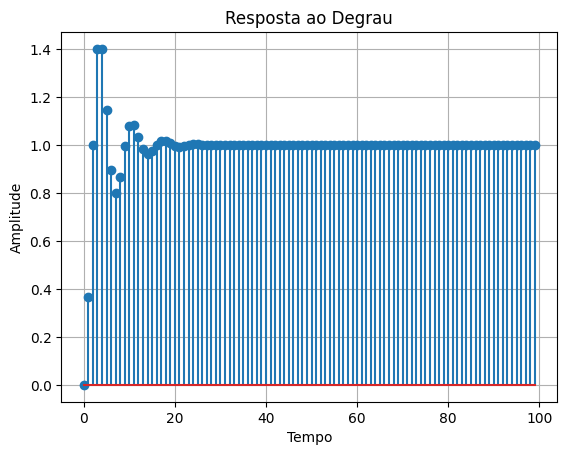

In [ ]:
import numpy as np
from scipy.signal import dlti, dstep
import matplotlib.pyplot as plt

# Definindo numerador e denominador
num = [0, 0.3678, 0.2644]
den = [1, -1, 0.6322]

# Criando o sistema discreto
system = dlti(num, den)

# Calculando a resposta ao degrau
t, y = dstep(system)

# Convertendo a lista de arrays em um array do numpy
y = np.squeeze(y)

# Plotando a resposta ao degrau
plt.stem(t, y, use_line_collection=True)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau')
plt.grid(True)
plt.show()


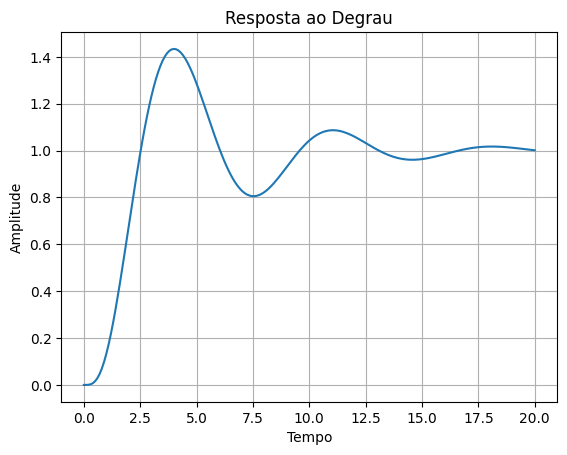

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo numerador e denominador
numg = [1]
deng = [1, 1, 0]

# Aproximação de Padé usando a biblioteca control
num_pade, den_pade = ctrl.pade(1, 2)

# Calculando numd e dend
numd = np.subtract(den_pade, num_pade)
dend = np.convolve([1, 0], den_pade)

# Criando a função de transferência
G1 = ctrl.TransferFunction(numd, dend)
G2 = ctrl.TransferFunction(numg, deng)

# Série de funções de transferência
G_series = G1 * G2

# Função de transferência em malha fechada
G_cloop = ctrl.feedback(G_series, 1)

# Vetor de tempo
t = np.arange(0, 20.1, 0.1)

# Resposta ao degrau
t, y = ctrl.step_response(G_cloop, T=t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau')
plt.grid(True)
plt.show()


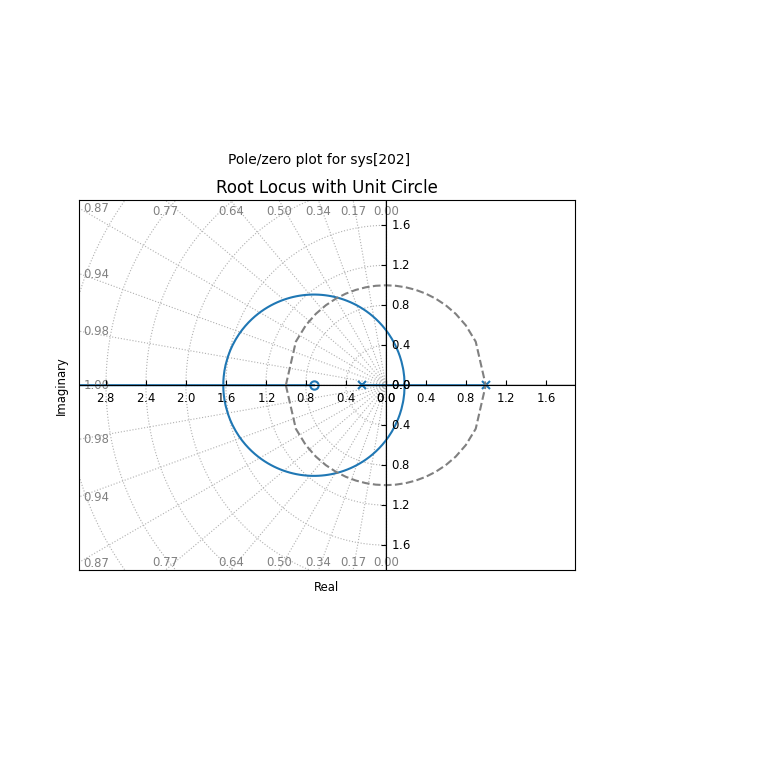

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo numerador e denominador
num = [0.3678, 0.2644]
den = [1.000, -0.7600, -0.2400]

# Plotando o lugar das raízes
rlocus_data = ctrl.root_locus(ctrl.TransferFunction(num, den), plot=True)
plt.grid(True)

# Plotando o círculo unitário
x = np.arange(-1, 1.1, 0.1)
y = np.sqrt(1 - x**2)
plt.plot(x, y, '--', color='gray')
plt.plot(x, -y, '--', color='gray')

# Exibindo o gráfico
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Root Locus with Unit Circle')
plt.show()
